### Machine Learning Tools 
#### Introduction to XGBoost
+ eXtreme Gradient Boosting

+ pip install xgboost


#### What is Boosting and Gradient Boosting?
+ Boosting : an ensemble technique of adding new models to correct the errors made by existing models
+ Boosting: is an ensemble method that seeks to create a strong classifier (model) based on “weak” classifiers. 
+ By adding models on top of each other iteratively, the errors of the previous model are corrected by the next predictor, until the training data is accurately predicted or reproduced by the model.
+ Gradient Boosting:
+ an ensemble method that sequentially adds predictors and corrects previous models. 
+ Procedure: instead of assigning different weights to the classifiers after every iteration, this method fits the new model to new residuals of the previous prediction and then minimizes the loss when adding the latest prediction
+ Gradient ?: use of gradient descent algorithm to minimise the loses during new models creation

#### Tips
+ Has a DMatrix( for performance and efficiency)
+ Works with only numerical values
+ For Categorical you need to one-hot-encode it/label encode it

#### Reasons For using XGBoost
+ Execution Speed
+ Model Performance.

#### Workflow
+ Load data 
        =>OnehotEncode Cat
        =>Split
        =>Model Initializing
        =>Fitting 
        =>Predict
 + Load data
     => Convert to DxMatrix
     => Cross validation
     => Train
     => Predict
     => Plot


Input variables:
   #### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ##### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   ##### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")
  ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","label"]

In [1]:
# Load Pkgs
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
# Load Dataset (California Housing)
df = pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Shape
df.shape

(41188, 21)

In [5]:
# Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Check Missing Values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
# Quick Data Profiling
import pandas_profiling as pp

In [11]:
pp.ProfileReport(df)

### Encode our categorical data
+ Category
+ Get Dummies
+ LabelEncoder/ LabelBinarizer
+ Custom Find and Replace


In [12]:
# Get All Columns that are object
df.columns[df.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [13]:
#Using Get Dummies
pd.get_dummies(df,df.columns[df.dtypes == 'object'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [14]:
# Check For Unique Values of Each Column
for i in df.columns[df.dtypes == 'object']:
    print(i,"::",df[i].unique())

job :: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital :: ['married' 'single' 'divorced' 'unknown']
education :: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default :: ['no' 'unknown' 'yes']
housing :: ['no' 'yes' 'unknown']
loan :: ['no' 'yes' 'unknown']
contact :: ['telephone' 'cellular']
month :: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week :: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome :: ['nonexistent' 'failure' 'success']
y :: ['no' 'yes']


In [15]:
df2 = df

In [16]:
# Using Categorical dtypes
for i in df.columns[df.dtypes == 'object']:
    print(i,"::")
    df2[i] = df[i].astype('category')
    df2[i] = df2[i].cat.codes


job ::
marital ::
education ::
default ::
housing ::
loan ::
contact ::
month ::
day_of_week ::
poutcome ::
y ::


In [17]:
df2.job.head()

0    3
1    7
2    7
3    0
4    7
Name: job, dtype: int8

In [18]:
df2.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object

In [19]:
df2.y.unique()

array([0, 1])

In [20]:
df2.shape

(41188, 21)

In [21]:
X= df2.iloc[:,0:20]

In [22]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [23]:
y = df2['y']

In [24]:
# Split dataset
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape

(32950, 20)

#### Building Models

In [27]:
#load Gradient Boosting From Sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
GB_classifier=GradientBoostingClassifier()
GB_classifier.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [29]:
y_predictions = GB_classifier.predict(X_test)

In [30]:
y_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [31]:
# Load Accuracy Score
from sklearn.metrics import accuracy_score

In [34]:
print("Accuracy of Model::",accuracy_score(y_test,y_predictions))

Accuracy of Model:: 0.9248604030104395


In [ ]:
### Using Decision Tree Classifier


In [35]:
# Load Pkg
from sklearn.tree import DecisionTreeClassifier

In [37]:
dTree_clf = DecisionTreeClassifier()

In [39]:
dTree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# Prediction
y_pred2 = dTree_clf.predict(X_test)

In [41]:
y_pred2

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [42]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred2))

Accuracy of Model:: 0.8929351784413693


### Using XGBoost

In [43]:
xgb_classifier = xgb.XGBClassifier()

In [44]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [45]:
predictions = xgb_classifier.predict(X_test)

In [46]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [47]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.9225540179655256


#### Single Prediction

In [48]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
15500,39,1,1,2,0,2,0,0,3,0,635,3,999,0,1,1.4,93.918,-42.7,4.957,5228.1
29034,55,1,1,0,0,2,0,0,0,0,248,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1
11199,39,1,1,2,1,0,0,1,4,2,207,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
22247,56,6,1,2,0,2,0,0,1,2,176,7,999,0,1,1.4,93.444,-36.1,4.963,5228.1
27180,49,1,1,2,0,2,0,0,7,0,271,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8


In [51]:
print("Prediction By DecisionTree::",dTree_clf.predict(np.array(X_test.iloc[1].values).reshape(1,-1)))

Prediction By DecisionTree:: [0]


In [52]:
print("Prediction By GradientBoosting::",GB_classifier.predict(np.array(X_test.iloc[1].values).reshape(1,-1)))

Prediction By GradientBoosting:: [0]


In [53]:
print("Prediction By XGBoost::",xgb_classifier.predict(np.array(X_test.iloc[1].values).reshape(1,-1)))

ValueError: feature_names mismatch: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19']
expected job, housing, default, pdays, cons.price.idx, education, age, euribor3m, cons.conf.idx, campaign, loan, nr.employed, month, marital, emp.var.rate, duration, day_of_week, previous, poutcome, contact in input data
training data did not have the following fields: f3, f12, f2, f4, f18, f17, f19, f0, f14, f7, f16, f5, f1, f15, f10, f11, f9, f13, f6, f8

In [88]:
# Solution for Value Error
# 1 Convert DF to Matrix as_matrix()
# 2 use double bracket for iloc eg X_test.iloc[[1]]
# feat_names = xgb_classifier.get_booster().feature_names

In [ ]:
# Solution for Value Error Feature Mismatch
X_matrix = X.as_matrix()
y_matrix = y.as_matrix()

xgb = XGBClassifier()
xgb.fit(X_matrix, y_matrix)
perm_xgb = PermutationImportance(xgb).fit(X_matrix, y_matrix)
eli5.show_weights(perm_xgb, feature_names=list(X))

In [54]:
# Solution 2 Using Double Brackets with Iloc
X_test.iloc[[1]]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
29034,55,1,1,0,0,2,0,0,0,0,248,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1


In [56]:
# Solution 2 Using Double Brackets with Iloc
print("Prediction By XGBoost::",xgb_classifier.predict(X_test.iloc[[1]]))

Prediction By XGBoost:: [0]


In [58]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt

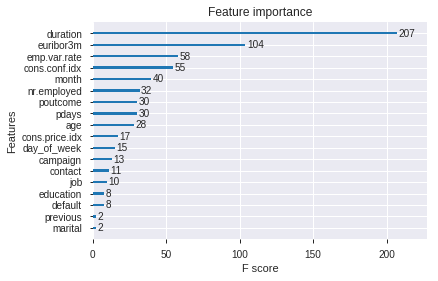

In [59]:
# Feature Importance
xgb.plot_importance(xgb_classifier)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### Alternative Using DMatrix

In [60]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [61]:
# Parameters
params = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }

In [62]:
# Create an XGBoost Classifier
xgb_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

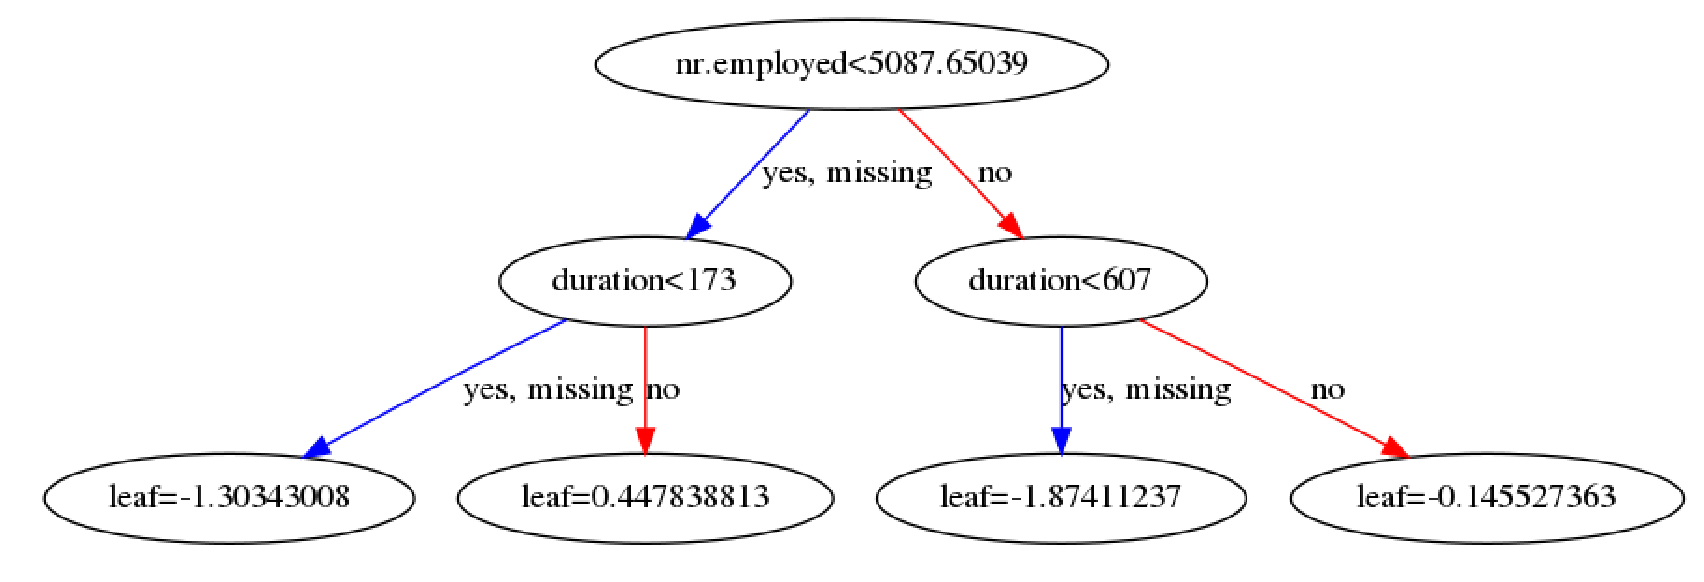

In [65]:
# Plot Decision Tree
xgb.plot_tree(xgb_clf,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

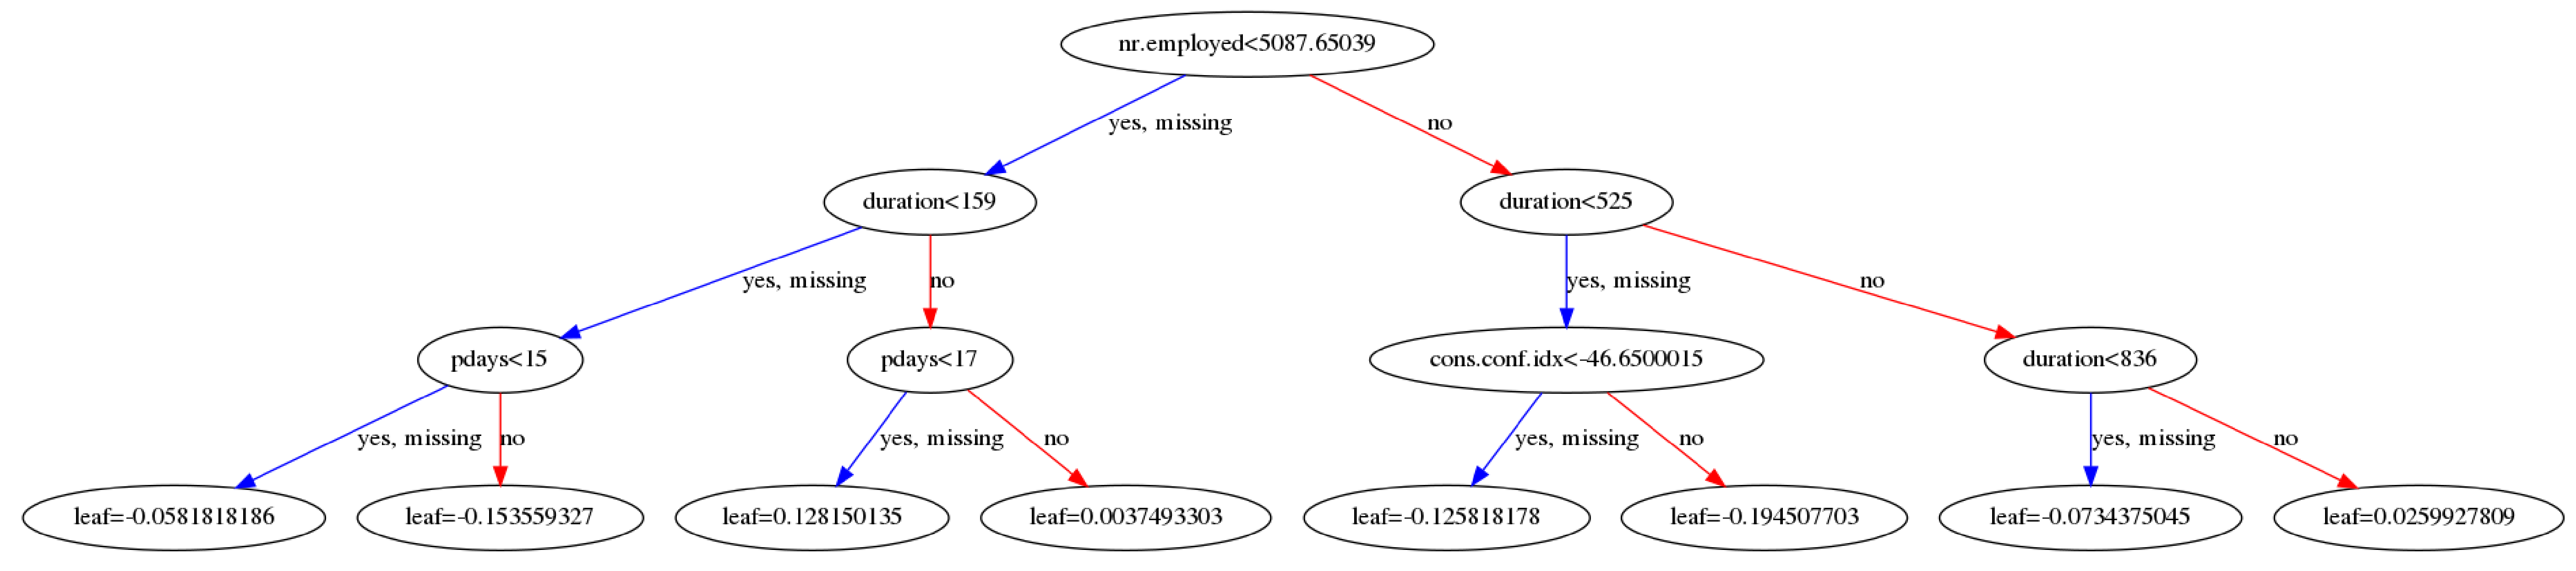

In [66]:
xgb.plot_tree(xgb_classifier,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

#### Feature Importance

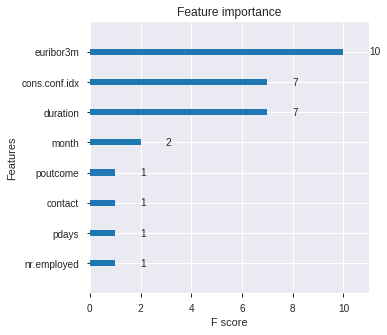

In [68]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Model Interpretation
+ LIME
+ Eli5
+ Shape

In [69]:
import eli5
from eli5 import show_weights

In [70]:
# Interpret Our Model
show_weights(xgb_classifier)

Weight,Feature
0.4344,nr.employed
0.1479,duration
0.0692,emp.var.rate
0.0527,pdays
0.0508,cons.conf.idx
0.0435,euribor3m
0.0385,contact
0.0259,poutcome
0.0252,month
0.0229,cons.price.idx


In [71]:
eli5.show_prediction(xgb_classifier, X_test.iloc[[1]], show_feature_values=True)

In [72]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [73]:
feature_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [74]:
# Showing Prediction with Specific Feature Name defined
eli5.show_prediction(xgb_classifier, X_test.iloc[[1]], show_feature_values=True,feature_names=feature_names)

#### using Shap

In [75]:
import shap  
shap.initjs()

In [76]:
# Create object that can calculate shap values
sh_explainer = shap.TreeExplainer(xgb_classifier)

In [77]:
# Calculate Shap values
shap_values = sh_explainer.shap_values(X_train)

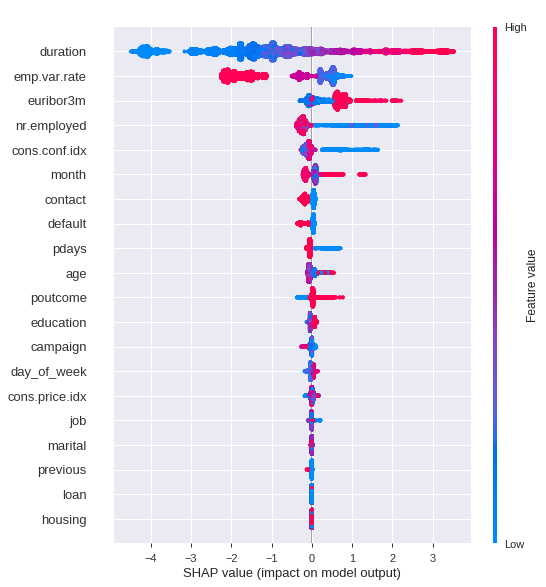

In [78]:
# Summary Plot 
shap.summary_plot(shap_values, X_train)

In [81]:
# Plot for A Sample of Prediction
#shap.force_plot(sh_explainer.expected_value[1], shap_values[1], X_train)

In [82]:
### Thanks For Watching
### Jesse E. Agbe(JCharis)
### Jesus Saves @JCharisTech
### J-Secur1ty